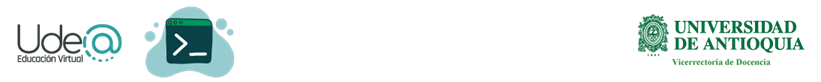

# <h1><center>PLOT COLOR QUANTIZATION K-MEANS</center></h1>

**Especialización en Analítica de Datos**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*


**2025-1**



# Color Quantization using K-Means


Performs a pixel-wise Vector Quantization (VQ) of an image of the summer palace
(China), reducing the number of colors required to show the image from 96,615
unique colors to 64, while preserving the overall appearance quality.

In this example, pixels are represented in a 3D-space and K-means is used to
find 64 color clusters. In the image processing literature, the codebook
obtained from K-means (the cluster centers) is called the color palette. Using
a single byte, up to 256 colors can be addressed, whereas an RGB encoding
requires 3 bytes per pixel. The GIF file format, for example, uses such a
palette.

For comparison, a quantized image using a random codebook (colors picked up
randomly) is also shown.


w:  427  , h:  640  , d:  3


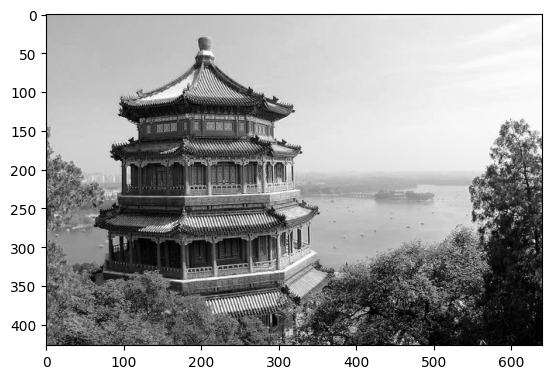

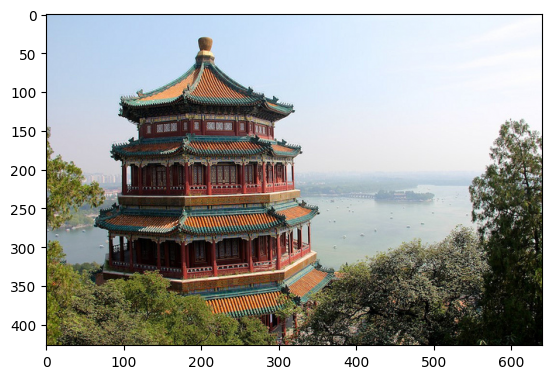

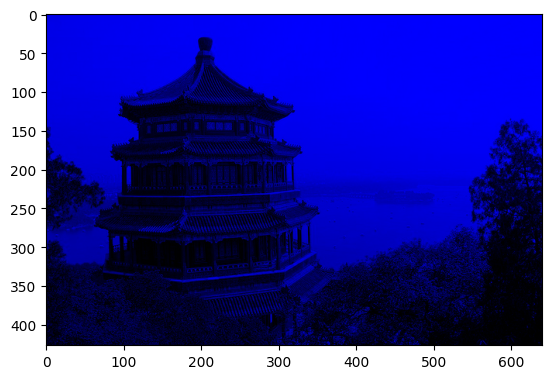

Grayscale:  0.4823529411764706
Coloscale:  [0.48235294 0.18431373 0.04313725]
RedPalette:  [0.         0.         0.04313725]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 16 # number of groups to compress

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
print('w: ',w,' , h: ',h,' , d: ',d)

# Let's plot one image's palette
imgPal = china[:,:,0]
plt.imshow(imgPal,cmap= plt.cm.gray)
plt.show()
plt.figure()
plt.imshow(china)
plt.show()

plt.figure()
chinaMod = china.copy()
chinaMod[:,:,[0,1]] = 0
plt.imshow(chinaMod)
plt.show()
print('Grayscale: ', imgPal[100,200])
print('Coloscale: ', china[100,200,:])
print('RedPalette: ', chinaMod[100,200,:])

In [2]:
assert d == 3
image_array = np.reshape(china, (w * h, d))


Fitting model on a small sub-sample of the data
done in 0.419s.
Predicting color indices on the full image (k-means)
done in 0.053s.
Predicting color indices on the full image (random)
done in 0.057s.


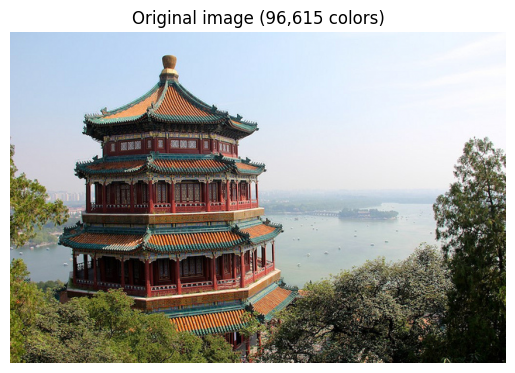

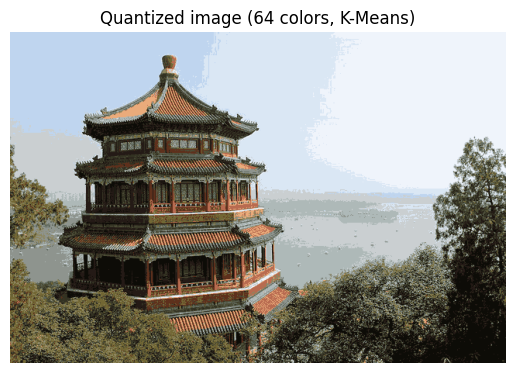

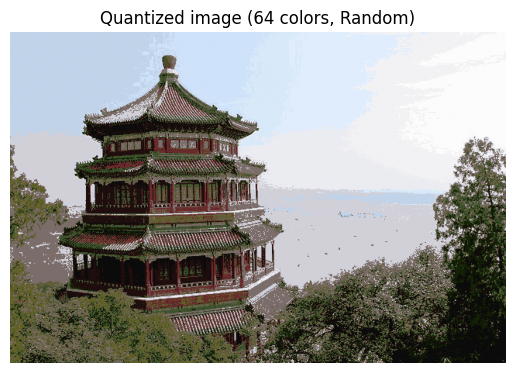

In [3]:

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i,j,:] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [4]:
# Let's visualize the first ten colors of each colorbook
print('Codebook KMEANS', kmeans.cluster_centers_[:10])
print('Codebook RANDOM', codebook_random[:10])

Codebook KMEANS [[0.37137255 0.19189542 0.11320261]
 [0.75034255 0.83850697 0.93796362]
 [0.55434174 0.52689076 0.37684407]
 [0.14410458 0.10583007 0.08679739]
 [0.68279857 0.72593583 0.72210339]
 [0.8552521  0.90630252 0.96064426]
 [0.38379085 0.41856209 0.37455338]
 [0.4496732  0.40751634 0.20679739]
 [0.79360483 0.81484163 0.82316742]
 [0.30078431 0.30280112 0.21411765]]
Codebook RANDOM [[0.92156863 0.9254902  0.94509804]
 [0.37647059 0.37647059 0.14117647]
 [0.48235294 0.42745098 0.41568627]
 [0.81960784 0.81568627 0.84705882]
 [0.98823529 0.98823529 0.98823529]
 [0.41568627 0.16470588 0.16862745]
 [0.94901961 0.94901961 0.95686275]
 [0.87843137 0.92941176 0.99215686]
 [0.24313725 0.32156863 0.17647059]
 [0.80784314 0.88627451 0.98039216]]


In [5]:
print('Labels KMEANS',labels)
print('Labels RANDOM',labels_random)

Labels KMEANS [ 1  1  1 ... 15 14 14]
Labels RANDOM [12 12 12 ...  8 13 10]


In [6]:
codebook_random[0]

array([0.92156863, 0.9254902 , 0.94509804])